# Regresión Lineal con Python y scikit-learn

## Introducción

En este artículo, exploraremos cómo usar **la regresión lineal con Python para construir modelos de aprendizaje automático que puedan predecir resultados futuros.** Antes de profundizar en la regresión lineal, es importante tener una comprensión sólida de los requisitos previos necesarios para abordar la regresión lineal.

Estos son los **requisitos** previos que se necesitan **para abordar la regresión lineal con Python**:


- [Conocimiento de matemáticas para la inteligencia artificial.](https://deepnote.com/@mazzaroli/Introduccion-a-Funciones-Matematicas-para-Data-Science-e-Inteligencia-Artificial-f9a47b52-0308-4e95-a3d3-c3de3ef7b14f)

- [Conocimiento de análisis exploratorio de datos.](https://deepnote.com/@mazzaroli/Analisis-exploratorio-de-datos-caba7762-e435-481e-9060-523263a820b1)

- Conocimiento de visualización de datos con [Matplotlib](https://matplotlib.org/stable/users/index.html) y [Seaborn](https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html).

- [Conocimiento de los fundamentos de la inteligencia artificial.](https://deepnote.com/@mazzaroli/Introduccion-teorica-al-machine-learning-c4aded88-a409-4731-b650-6b3b43963d21)


Si no estás cómodo con estos conceptos, te recomendamos que primero los revises y los estudies antes de continuar con la regresión lineal. Con estos requisitos previos en mente, comenzaremos explorando cómo usar la regresión lineal con Python.

## Conociendo nuestros datos

En esta notebook aprenderás qué es una regresión lineal y cómo funciona con un ejemplo con Python. Para esto **lo primero que tendremos que hacer es descargar los datos y entender qué contienen.**

El conjunto de datos [**"Housing"**](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/) del repositorio de aprendizaje automático de la **Universidad de California en Irvine (UCI)** es uno de los conjuntos de datos más utilizados en la enseñanza de técnicas de regresión y análisis de datos.

**El conjunto de datos contiene 506 registros y 14 atributos**, que incluyen información como la tasa de impuesto a la propiedad, la proporción de habitaciones por vivienda ocupada, la tasa de criminalidad per cápita, entre otros.

1. **CRIM:** tasa de delincuencia per cápita por ciudad

1. **ZN:** proporción de terrenos residenciales zonificados para lotes de más de 25.000 pies cuadrados

1. **INDUS:** proporción de acres de negocios no minoristas por ciudad

1. **CHAS:** variable ficticia del río Charles (= 1 si la parcela limita con el río; 0 en caso contrario)

1. **NOX:** concentración de óxidos nítricos (partes por cada 10 millones)

1. **RM:** número promedio de habitaciones por vivienda

1. **AGE:** proporción de unidades ocupadas por sus propietarios construidas antes de 1940

1. **DIS:** distancias ponderadas a cinco centros de empleo de Boston

1. **RAD:** índice de accesibilidad a carreteras radiales

1. **TAX:** tasa de impuesto sobre la propiedad de valor total por cada $10,000

1. **PTRATIO:** relación alumno-maestro por ciudad

1. **B:** 1000(Bk - 0.63)^2 donde Bk es la proporción de negros por ciudad

1. **LSTAT:** % de estatus social bajo de la población

1. **MEDV:** valor mediano de las viviendas ocupadas por sus propietarios en miles de dólares ($1000)

In [22]:
import pandas as pd

df = pd.read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data', 
    header=None, # especificamos que el dataset no tiene headers.
    sep='\s+') # especificamos que la separacion esta hecha por espacios y no por comas.

df.columns = ["CRIM","ZN","INDUS" , "CHAS" ,"NOX","RM" ,"AGE","DIS", "RAD","TAX", "PTRATIO", "B" , "LSTAT" , "MEDV"]

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


## Análisis de datos para tu primera regresión lineal

Es importante saber que el algoritmo de regresión lineal se basa altamente en correlaciones por lo que recomiendo que empecemos viendo un gráfico de correlaciones usando **[pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html)** de ***Seaborn*** con las siguientes variables objetivos:

- **DIS:** distancias ponderadas a cinco centros de empleo de Boston
- **INDUS:** proporción de acres de negocios no minoristas por ciudad
- **CRIM:** tasa de delincuencia per cápita por ciudad
- **RM:** número promedio de habitaciones por vivienda
- **MEDV:** valor mediano de las viviendas ocupadas por sus propietarios en miles de dólares ($1000)

### Análisis visual


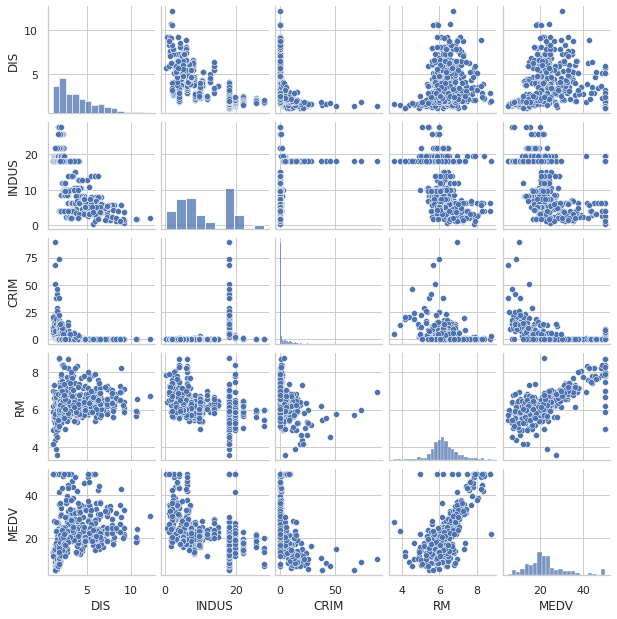

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configuramos la apariencia de los graficos
sns.set(style='whitegrid', context='notebook')

# Seleccionamos los features que mas nos interesa para ver la correlacion entre las variables
cols = ["DIS", "INDUS", "CRIM", "RM","MEDV"]

# Graficamos con un pairplot las variables de interes para ver sus relaciones
sns.pairplot(df[cols], height=1.75);

#### Insight
Al observar la distribución de la variable **MEDV**, podemos ver que se asemeja a una **distribución normal** con algunos valores atípicos. Esto es importante porque **MEDV es la variable objetivo que se desea predecir**. Si la variable objetivo sigue una distribución normal, es más fácil y preciso construir un modelo que pueda predecir su valor.

Además, la variable **RM** también muestra un similitud a una distribución normal. En este caso, se puede observar una **tendencia lineal positiva entre RM y MEDV**, lo que **sugiere que a medida que aumenta el valor de RM, también aumenta el valor de MEDV**. Por lo tanto, se podría utilizar esta relación para construir un **modelo de regresión lineal** que prediga el valor de MEDV en función de RM.

## Análisis numérico

Al realizar un **análisis visual** de un conjunto de datos, **se obtienen ideas generales de las relaciones entre las variables** y patrones. Sin embargo, **es importante complementarlo con un análisis numérico para confirmar que nuestras suposiciones** para confirmar si son correctas.

**El análisis numérico** puede incluir el cálculo de medidas estadísticas como la **media, la mediana y la desviación estándar**, así como la realización de **pruebas de hipótesis** y la evaluación de **correlaciones entre variables**.

En este caso, **se observa una relación aparentemente lineal**, por lo cual **es necesario calcular la correlación numérica para determinar si es significativa y cuánto es su fuerza**. Asimismo, **en cuanto a los valores atípicos**, es necesario analizar numéricamente su **impacto en las medidas estadísticas** y determinar si deben ser **excluidos** o si representan **información importante**.

<AxesSubplot: >

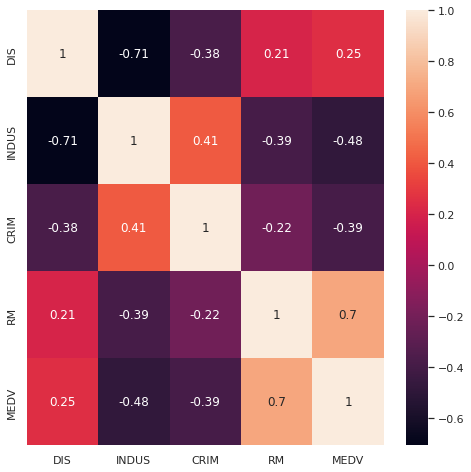

In [51]:
sns.heatmap(
    data=df[cols].corr(), 
    cbar=True, annot=True, yticklabels=cols, xticklabels=cols)

#### Insight

En particular, se observó que la correlación entre las variables RM y MEDV es positiva y relativamente alta en comparación con las demás variables. Esto significa que a medida que aumenta el número promedio de habitaciones por vivienda (RM), también tiende a aumentar el valor mediano de las viviendas ocupadas por sus propietarios (MEDV). 

Este tipo de información puede ser valiosa para los expertos en bienes raíces, por ejemplo, ya que les permite comprender mejor cómo se relacionan las diferentes características de las viviendas con su valor.